<a href="https://colab.research.google.com/github/jainalphin99/Deep-Learning-Use-Cases/blob/main/Tomato_Diseases/Tomato_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d noulam/tomato

 97% 724M/743M [00:09<00:00, 88.1MB/s]
100% 743M/743M [00:09<00:00, 82.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name ="tomato.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Don')

Don


In [ ]:
!nvidia-smi

Sun Nov 15 09:45:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]
train_path="/content/New Plant Diseases Dataset(Augmented)/train"
valid_path="/content/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False 

In [ ]:
folder=glob("/content/New Plant Diseases Dataset(Augmented)/train/*")

In [ ]:
folder

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold']

In [ ]:
  x= Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folder),activation="softmax")(x)

In [ ]:
model = Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen =ImageDataGenerator(rescale =1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',target_size=(224,224),batch_size=16,class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',target_size=(224,224),batch_size=16,class_mode='categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1147/1147 [==============================] - 275s 240ms/step - loss: 4.0874 - accuracy: 0.6825 - val_loss: 3.2353 - val_accuracy: 0.7736
Epoch 2/10
1147/1147 [==============================] - 270s 236ms/step - loss: 3.5051 - accuracy: 0.7894 - val_loss: 5.7375 - val_accuracy: 0.7459
Epoch 3/10
1147/1147 [==============================] - 268s 233ms/step - loss: 3.3093 - accuracy: 0.8199 - val_loss: 3.4676 - val_accuracy: 0.8196
Epoch 4/10
1147/1147 [==============================] - 266s 232ms/step - loss: 3.3388 - accuracy: 0.8360 - val_loss: 3.4950 - val_accuracy: 0.8297
Epoch 5/10
1147/1147 [==============================] - 265s 231ms/step - loss: 2.9497 - accuracy: 0.8569 - val_loss: 4.2097 - val_accuracy: 0.8153
Epoch 6/10
1147/1147 [==============================] - 264s 230ms/step - loss: 2.7455 - accuracy: 0.8646 - val_loss: 3.7331 - val_accuracy: 0.8486
Epoch 7/10
1147/1147 [==============

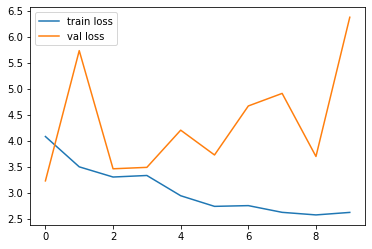

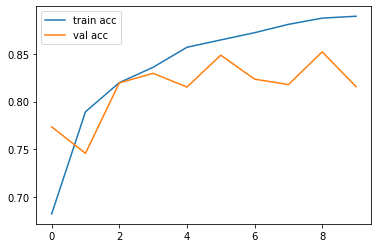

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

